#  Final Project Submission
Please fill out:

- Student name: Ethan Kunin
- Student pace: Full Time
- Scheduled project review date/time: March 23rd 4:00pm EST
- Instructor name: James Irving
- Blog post URL: https://github.com/kuninethan95/dsc-phase-1-project

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Questions and Conclusions

- Which directors generate the highest revenue per film?
- What month generates the highest revenue for films?
- What film length generates the highest revenue?
- Do franchise films earn more than non-franchise films

In [2]:
# Import necessary libraries and packages

import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import requests

In [3]:
# Display where the data is contained

folder = "/Users/ethankunin/Documents/Flatiron/Phase_1/Movie_Project1/dsc-phase-1-project/zippedData/"
os.listdir(folder)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [4]:
files = glob.glob(f"{folder}*.csv*")

In [5]:
# Load in files and display preview

tables = {}
dashes='---'*25

for file in files:
    ## Save a variable-friendly version of the file name
    table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
    print(dashes)
    
    ## Load and preview dataframe
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()

---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


# Description of each table with unique identifiers

- imdb_title_crew: id's to link crew members with titles

- tmdb_movies - titles and stats from IMDB

- imdb_title_akas - link between id and movie title

- imdb_title_ratings - link between title and IMDB ratings

- imdb_name_basics - name of cast member and id

- imdb_title_basics - movie title, id, and runtime

- tn_movie_budgets - movie title, release date, and earnings/costs

- bom_movie_gross - movie title, studio, and earnings

- imdb_title_principals - link between movie title and cast cast id

In [6]:
# Link each file to a Pandas dataframe

filepath0 = files[0]
imdb_title_crew = pd.read_csv(filepath0)

In [7]:
filepath1 = files[1]
tmdb_movies = pd.read_csv(filepath1)

In [8]:
filepath2 = files[2]
imdb_title_akas = pd.read_csv(filepath2)

In [9]:
filepath3 = files[3]
imdb_title_ratings = pd.read_csv(filepath3)

In [10]:
filepath4 = files[4]
imdb_name_basics = pd.read_csv(filepath4)

In [11]:
filepath5 = files[5]
imdb_title_basics = pd.read_csv(filepath5)

In [12]:
filepath6 = files[6]
tn_movie_budgets = pd.read_csv(filepath6)

In [13]:
filepath7 = files[7]
bom_movie_gross = pd.read_csv(filepath7)

In [14]:
filepath8 = files[8]
imdb_title_principals = pd.read_csv(filepath8)

# Analyze how runtime impacts revenue
- Do longer movies earn more revenue than shorter movies?
- Is there correlation between film length and run time?

In [15]:
# Merge movie budgets/earnings with titles to display runtime

movie_rt = tn_movie_budgets.merge(imdb_title_basics, left_on='movie', right_on='original_title', how='inner')

In [16]:
movie_rt.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [17]:
movie_rt.info()

# Going to have to turn production_budget/domestic_gross/worldwide_gross into integers
# Only column with significant null values is runtime_minutues, may account for this by imputing the median

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3537 non-null   int64  
 1   release_date       3537 non-null   object 
 2   movie              3537 non-null   object 
 3   production_budget  3537 non-null   object 
 4   domestic_gross     3537 non-null   object 
 5   worldwide_gross    3537 non-null   object 
 6   tconst             3537 non-null   object 
 7   primary_title      3537 non-null   object 
 8   original_title     3537 non-null   object 
 9   start_year         3537 non-null   int64  
 10  runtime_minutes    3070 non-null   float64
 11  genres             3473 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 359.2+ KB


## Clean Data
- Sort for commercial release by only including films with production_budgets > $20,000000 (classified as commercial budget)
- Only use movies from 2010 onwards (streaming more prominence)
- Convert production_budget/domestic_gross/worldwide_gross into integers
- Impute runtime_minutes with either mean/median
- Check for outliers
- Feature engineer short/medium/long
- Drop unnecessary columns
- https://www.marketwatch.com/story/netflix-reportedly-set-to-produce-90-movies-a-year-with-budgets-up-to-200-million-2018-12-16

In [18]:
# Feature engineer function to turn budget/gross into integers

def col_to_int(df, colm):
    df[colm] = df[colm].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')).astype('int')
    return df

In [19]:
col_to_int(movie_rt, 'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,"$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,"$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,NaN
3533,70,"Apr 1, 1996",Bang,10000,$527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,9000,"$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [20]:
col_to_int(movie_rt, 'domestic_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,94596,"$94,596",tt5936960,Cure,Cure,2014,NaN,NaN
3533,70,"Apr 1, 1996",Bang,10000,527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,9000,4584,"$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [21]:
col_to_int(movie_rt, 'worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,94596,94596,tt5936960,Cure,Cure,2014,NaN,NaN
3533,70,"Apr 1, 1996",Bang,10000,527,527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [22]:
# Filter out movies with production budgets under $20,000,000

movie_rt = movie_rt.loc[movie_rt['production_budget'] > 20000000]

In [23]:
# Feature Engineer year column. Not going to use DateTime yet because will want to engineer a seasonal column
# Convert year into an int

movie_rt['year'] = movie_rt['release_date'].map(lambda x: x[-4:])
movie_rt['year'] = movie_rt['year'].astype('int')

<ipython-input-23-9bf4465972f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rt['year'] = movie_rt['release_date'].map(lambda x: x[-4:])
<ipython-input-23-9bf4465972f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rt['year'] = movie_rt['year'].astype('int')


In [24]:
# Slice out movies from before 2010

movie_rt = movie_rt[movie_rt['year'] >= 2010]

In [25]:
# We have 8.2% of movies with null runtime_minutes

(movie_rt['runtime_minutes'].isna().sum())/len(movie_rt)* 100

8.018018018018019

In [26]:
# Check for duplicates
# 298 duplicates, upon inspection doesn't look like there's a reason other than inner join
#Drop if they contain the same movie title and release date

movie_rt[movie_rt.duplicated(subset=['movie', 'release_date'])]
movie_rt.duplicated(subset=['movie', 'release_date']).sum()
movie_rt.drop

<bound method DataFrame.drop of       id  release_date                                        movie  \
0      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
1      3   Jun 7, 2019                                 Dark Phoenix   
2      4   May 1, 2015                      Avengers: Age of Ultron   
3      7  Apr 27, 2018                       Avengers: Infinity War   
4      9  Nov 17, 2017                               Justice League   
...   ..           ...                                          ...   
1578  69   Aug 4, 2017                                       Kidnap   
1579  72   Dec 9, 2011                    Tinker Tailor Soldier Spy   
1581  79   May 6, 2011                                   The Beaver   
1582  80  Feb 24, 2017                               Bitter Harvest   
1586  82   Feb 1, 2019                               Velvet Buzzsaw   

      production_budget  domestic_gross  worldwide_gross     tconst  \
0             410600000       241063875     

In [27]:
# Clear out movies with runtimes under 80 minutes
#https://screenwriting.io/what-is-a-feature-film/#:~:text=A%20modern%20feature%20is%20typically,than%2040%20minutes%20a%20feature.

movie_rt = movie_rt[(movie_rt['runtime_minutes'] > 80) & (movie_rt['runtime_minutes'] < 180)]

In [28]:
movie_rt.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
year                 0
dtype: int64

In [29]:
# Find the approxomate cutoff for short/medium/long movies based on quintile
# For analysis, want an equal amount of observations in each row

display(np.quantile(movie_rt['runtime_minutes'], 0.33))
np.quantile(movie_rt['runtime_minutes'], 0.66)

102.0

117.0

In [30]:
#Now we check again for null values

(movie_rt['runtime_minutes'].isna().sum())/len(movie_rt)* 100

0.0

In [31]:
# Feature engineer function to categorize movie lenght by duration
# Use .33 and 0.66 quintile to distinguish length

def length(mins):
    if mins < 100:
        return 'short'
    elif mins < 120:
        return 'medium'
    else:
        return 'long'

In [32]:
movie_rt['duration'] = movie_rt['runtime_minutes'].map(length)

<ipython-input-32-612a18e56b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rt['duration'] = movie_rt['runtime_minutes'].map(length)


In [33]:
# Most movies fall into the short category, then medium, then long

movie_rt.groupby('duration').count()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,year
duration,,,,,,,,,,,,,
long,273,273,273,273,273,273,273,273,273,273,273,273,273
medium,398,398,398,398,398,398,398,398,398,398,398,398,398
short,250,250,250,250,250,250,250,250,250,250,250,250,250


## Visualization A: Create boxplot to illustrate how runtime impacts revenue

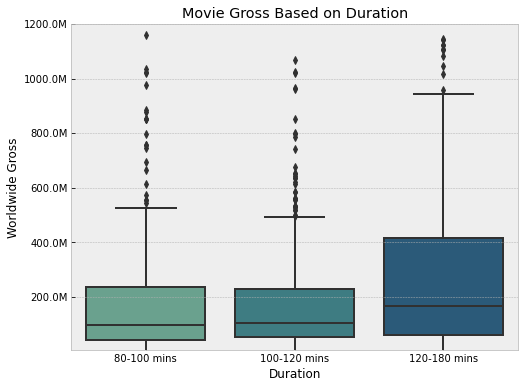

In [34]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

#https://stackoverflow.com/questions/61330427/set-y-axis-in-millions

with plt.style.context('bmh'): 
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.boxplot(x='duration', y='worldwide_gross', data=movie_rt, palette='crest', order=['short', 'medium', 'long'])
    
    ax.set_ylim(5000000, 1200000000)
    ax.set_title('Movie Gross Based on Duration')
    ax.set_ylabel('Worldwide Gross')
    ax.set_xlabel('Duration')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    x_labs = ['80-100 mins', '100-120 mins', '120-180 mins']
    ax.set_xticklabels(x_labs);
    plt.savefig("/Users/ethankunin/Desktop/movie_season.png", transparent=False, facecolor='white')

### Conclusion 
- Long movies have the highest median
- Long movies have the largest distributional spread
- Short and medium length movies have similar distributions
- Overall, I recommend making long movies based on this figure

## Visualization B: Create linear regression plot to illustrate how runtime impacts revenue

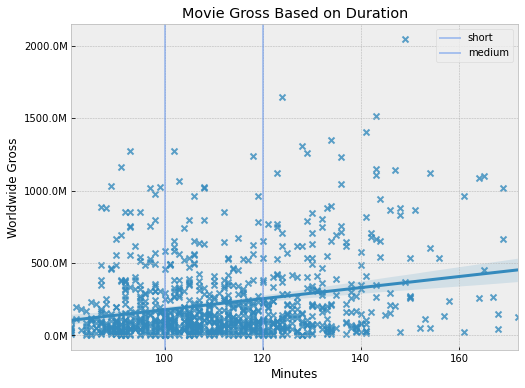

In [35]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.regplot(x='runtime_minutes', y='worldwide_gross', data=movie_rt, marker ="x")

    ax.set_title('Movie Gross Based on Duration')
    ax.set_ylabel('Worldwide Gross')
    ax.set_xlabel('Minutes')
    ax.axvline(x=100, color='cornflowerblue', linestyle='solid', label='short', alpha=0.5)
    ax.axvline(x=120, color='cornflowerblue', linestyle='solid', label='medium', alpha=0.5)
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    ax.legend();

### Conclusion 
- There is a positive trend between film duration and worldwide gross
- Long movies have more outlier values

# Analyze which directors generate the highest revenue
- Are the top directors generally profitable?
- How much revenue do top directors' films earn?
- Are all films that top directors produce domestically and globabally profitable

In [36]:
# Merge to create table that shows primary name with nconst/tconst id

name_titles = imdb_name_basics.merge(imdb_title_principals, how='left', on='nconst')
name_titles.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9.0,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,7.0,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,8.0,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,8.0,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,7.0,composer,NaN,NaN


In [37]:
#Merge to create table that shows primary name and job function

names_movies = imdb_title_akas.merge(name_titles, how='inner', left_on='title_id', right_on='tconst')

## Clean Data
- Sort for only directors and US verion of movies
- Handle duplicates
- Handle null values

In [38]:
# Filter out non-directors

names_movies = names_movies[names_movies['category'] == 'director']

In [39]:
# Sort such that we are only showing the American version use 'US'

names_movies = names_movies[names_movies['region'] == 'US']

In [40]:
# Filter out directors who are no longer alive

names_movies = names_movies[names_movies['death_year'].isna()]
names_movies.head()

,title_id,ordering_x,title,region,language,types,attributes,is_original_title,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering_y,category,job,characters
125,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
205,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
215,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
285,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
375,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN


In [41]:
# Merge to create table that shows primary name and movie

movie_direct = movie_rt.merge(names_movies, how='left', left_on='movie', right_on='title')

In [42]:
# Clean up excess columns from merge

movie_direct.columns
cols_to_remove = ['original_title', 'runtime_minutes', 'genres', 'year', 'duration', 'title_id', 
                  'title', 'types','nconst','primary_profession', 'known_for_titles',
                  'tconst_y', 'category', 'job', 'primary_title', 'start_year', 'ordering_x', 'attributes',
                   'language', 'is_original_title', 'ordering_y', 'characters']

In [43]:
movie_direct = movie_direct.drop(columns=(cols_to_remove))

In [44]:
# Check for duplicates from merge

(movie_direct.duplicated(subset=['release_date', 'movie'])).sum()

518

In [45]:
movie_direct = movie_direct.drop_duplicates(subset=['release_date', 'movie'])

In [46]:
# Remove null values

movie_direct[movie_direct['primary_name'].isna()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year
8,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,tt2379713,NaN,NaN,NaN,NaN
9,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,tt1345836,NaN,NaN,NaN,NaN
89,88,"Jul 1, 2016",The Legend of Tarzan,180000000,126643061,348902025,tt0918940,NaN,NaN,NaN,NaN
144,36,"Dec 21, 2018",Aquaman,160000000,335061807,1146894640,tt1477834,NaN,NaN,NaN,NaN
150,46,"Jun 10, 2016",Warcraft,160000000,47225655,425522281,tt0803096,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1306,49,"Oct 31, 2014",Before I Go to Sleep,22000000,3242457,19563579,tt1726592,NaN,NaN,NaN,NaN
1313,52,"Dec 31, 2013",Metegol,22000000,0,34061097,tt1634003,NaN,NaN,NaN,NaN
1314,58,"Jun 22, 2012",To Rome with Love,21500000,16684352,74326015,tt1859650,NaN,NaN,NaN,NaN
1325,79,"May 6, 2011",The Beaver,21000000,970816,5046038,tt1321860,NaN,NaN,NaN,NaN


In [47]:
movie_direct = movie_direct.dropna(axis=0, subset=['primary_name'])

## Categorize/List Top Directors
- Groupby sum/mean of domestic/worlwide gross
- Feature engineer T/F of profitable/unprofitable for scatter plot

In [48]:
# Prepare plots by grouping by top 20 director name, type of gross, mean and sum

tp_dgmean = movie_direct.groupby('primary_name')['domestic_gross'].mean().sort_values().nlargest(20).reset_index()
tp_dgmean

,primary_name,domestic_gross
0,Ryan Coogler,700059566.0
1,Colin Trevorrow,652270625.0
2,Joss Whedon,541142707.5
3,Angus MacLane,486295561.0
4,Joe Russo,448882263.0
5,J.A. Bayona,417719760.0
6,Patty Jenkins,412563408.0
7,Adam Green,400738009.0
8,Tim Miller,363070709.0
9,Artie Mandelberg,356461711.0


In [49]:
tp_dgsum = movie_direct.groupby('primary_name')['domestic_gross'].sum().sort_values().nlargest(20).reset_index()

In [50]:
tp_wgmean = movie_direct.groupby('primary_name')['worldwide_gross'].mean().sort_values().nlargest(20).reset_index()

In [51]:
tp_wgsum = movie_direct.groupby('primary_name')['worldwide_gross'].sum().sort_values().nlargest(20).reset_index()
tp_wgsum

,primary_name,worldwide_gross
0,Joe Russo,3902605502
1,Peter Jackson,2922948044
2,Joss Whedon,2920949860
3,Michael Bay,2911998250
4,Francis Lawrence,2543191543
5,Zack Snyder,2420920114
6,Kyle Balda,2195063923
7,Christopher Nolan,2001741385
8,Lee Unkrich,1866887623
9,Steven Spielberg,1762841457


## Create Visualization: Top 20 Directors, 2 Graphs to display WW and Mean/Sum

<ipython-input-52-7733827f78ab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels1)
<ipython-input-52-7733827f78ab>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels2)


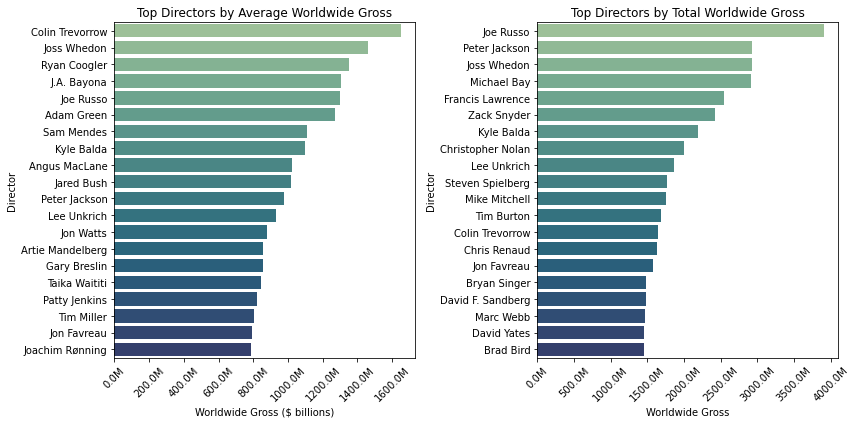

In [52]:
# Opted to use mean because the outliers are a valuable data point
# Outlier movies can produce significant impact on production company balance sheet

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

x_labels1 = ['$0.0', '$0.2', '$0.4', '$0.6', '$0.8', '$1.0', '$1.2', '$1.4', '$1.6']
x_labels2 = ['$0.0', '$0.5', '$1.0', '$1.5', '$2.0', '$2.5', '$3.0', '$3.5', '$4.0']
ax1 = sns.barplot(data=tp_wgmean, x='worldwide_gross', y='primary_name', ax=ax1, palette='crest')
ax1.set_title('Top Directors by Average Worldwide Gross')
ax1.set_xlabel('Worldwide Gross ($ billions)')
ax1.set_ylabel('Director')
ax1.set_xticklabels(x_labels1)
formatter = FuncFormatter(millions)
ax1.xaxis.set_major_formatter(formatter)
ax1.tick_params(axis='x', labelrotation = 45)


ax2 = sns.barplot(data=tp_wgsum, x='worldwide_gross', y='primary_name', ax=ax2, palette='crest')
ax2.set_title('Top Directors by Total Worldwide Gross')
ax2.set_xlabel('Worldwide Gross')
ax2.set_ylabel('Director')
ax2.set_xticklabels(x_labels2)
formatter = FuncFormatter(millions)
ax2.xaxis.set_major_formatter(formatter)
ax2.tick_params(axis='x', labelrotation = 45)
fig.tight_layout();

### Conclusion 
- Many of the directors on the left chart also appear on the right
- Valuable list to parse through when considering who will direct the first film

In [53]:
# Create list of top 20 directors by total worldwide gross

td = list(tp_wgsum['primary_name'])

In [54]:
# Group table into top 20 directors and determine how profitable they are

dftd = movie_direct[movie_direct['primary_name'].isin(td)]

In [55]:
dftd2 = dftd.copy()

In [56]:
# Profit column for absolute

dftd2['profit'] = dftd2['worldwide_gross'] - dftd2['production_budget']

In [57]:
# Feature engineer column to display if movie is profitable (domestic/worldwide)

def profitable(num):
    if num > 0:
        return True
    elif num < 0:
        return False

In [58]:
dftd2['pwtf'] = dftd2['profit'].map(profitable)

In [59]:
# Profit margin column

dftd2['pmarg'] = (dftd2['worldwide_gross'] - dftd2['domestic_gross'])/(dftd2['worldwide_gross']) * 100

In [60]:
dftd2['profitdom'] = dftd2['domestic_gross'] - dftd2['production_budget']

In [61]:
# Insert column with boolean values for film profitability 

dftd2['pdtf'] = dftd2['profitdom'].map(profitable).rename('Domestically Profitable')
dftd2.rename(columns={'pdtf': 'Domestically_Profitable'}, inplace=True)

## Create Visualization: Analyze profitablity and relationship between budget and worldwide revenue for Top Directors

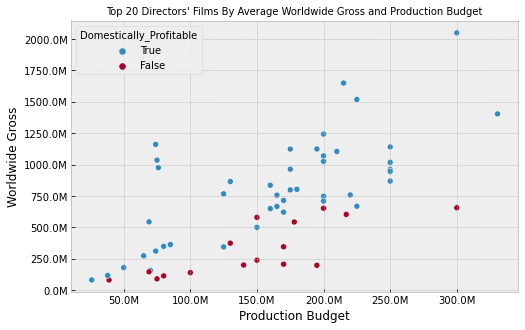

In [62]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.scatterplot(x='production_budget', y='worldwide_gross', data=dftd2,
                    hue='Domestically_Profitable',hue_order=(True, False))

    ax.set_title('Top 20 Directors\' Films By Average Worldwide Gross and Production Budget', fontdict={'fontsize':10})
    ax.set_xlabel('Production Budget')
    ax.set_ylabel('Worldwide Gross')
    
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    formatter = FuncFormatter(millions)
    ax.xaxis.set_major_formatter(formatter)


### Conclusion 
- Positive relationship between production budget & worldwide gross
- Not all movies are domestically profitable
- All movies are profitable when comparing production budget to worldwide gross

# Analyze when the best time to release a movie is
- Create visualization based on month showing average earnings
- Analyze which season is generates the highest amount of revenue
- Analyze which month generates the highest revenue per film on average

## Clean Data: 
- Feature engineer month column
- Feature engineer season column

In [63]:
budgets_seasons = movie_direct.copy()

In [64]:
# Add month column

budgets_seasons['month'] = budgets_seasons['release_date'].map(lambda x: x[0:3])

In [65]:
# Map month to numbers

month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec':12}
budgets_seasons['month_num'] = budgets_seasons['month'].map(month_map)

In [66]:
# Check for NaN
# No relevant NaN values

budgets_seasons.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst_x               0
region                 0
primary_name           0
birth_year           151
death_year           684
month                  0
month_num              0
dtype: int64

<AxesSubplot:>

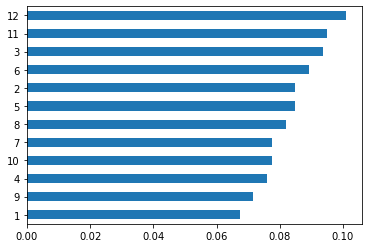

In [67]:
# Quickly analyze distribution of film releases by month

budgets_seasons['month_num'].value_counts(normalize=True).sort_values().plot(kind='barh')

In [68]:
# Groupby month and display domestic/worlwide growth

g2p = budgets_seasons.groupby('month_num')[['domestic_gross', 'worldwide_gross']].agg('mean').reset_index()

## Create Visualization: Side by Side bar plot showing how much revenue each month generates on average

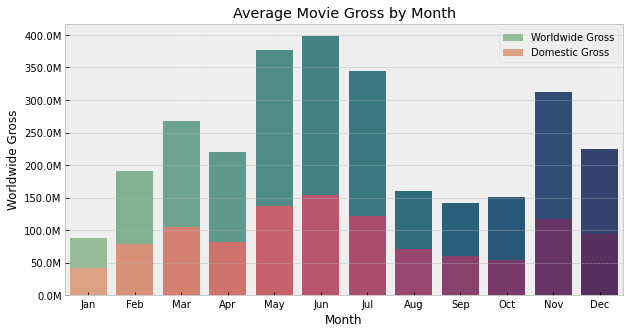

In [103]:
with plt.style.context('bmh'): 
    fig, ax = plt.subplots(figsize=(10,5))
    ax = sns.barplot(x='month_num', y="worldwide_gross", data=g2p, label='Worldwide Gross', palette='crest')
    ax = sns.barplot(x='month_num', y="domestic_gross", data=g2p, label= 'Domestic Gross', palette='flare')
    t_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticklabels(t_labels)
    
    ax.set_xlabel('Month', color='black')
    ax.set_ylabel('Worldwide Gross')
    ax.set_title('Average Movie Gross by Month')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    ax.legend()
    plt.savefig("/Users/ethankunin/Desktop/movie_month1.png")

### Conclusion 
- June movie generate the highest revenue on average followed by May and July
- Worldwide gross is greater than domestic gross in every month

In [70]:
# Feature engineer function that turns month into corresponding season

def seasons(month):
    if (month >= 3) & (month <= 5):
        return 'Spring'
    elif (month >= 6) & (month <=8):
        return 'Summer'
    elif (month >= 9) & (month <=11):
        return 'Fall'
    else:
        return 'Winter'

In [71]:
budgets_seasons['season'] = budgets_seasons['month_num'].map(seasons)

## Create Visualization: Boxplot of worldwide gross based on season

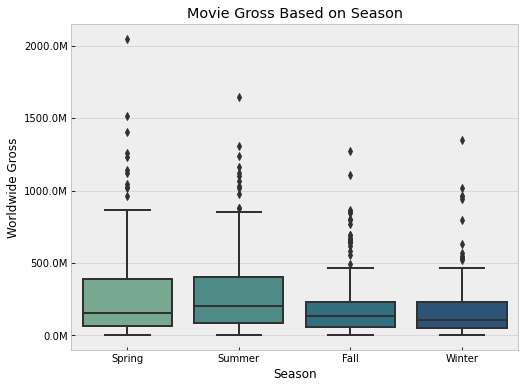

In [72]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.boxplot(x='season', y='worldwide_gross', data=budgets_seasons, palette='crest')
    ax.set_title('Movie Gross Based on Season')
    ax.set_ylabel('Worldwide Gross')
    ax.set_xlabel('Season')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)



### Conclusion 
- Spring and Summer films have the highest medians
- Spring and Summer films have larger distributions
- Corresponds with our month observations

# Display how movies have performed the past 10 years through trends
- Group movies into median gross by year
- Prefer this to line graph because there's too much noise/daily movements to accurately show the trend
- Show how production costs have varied
- Show how Worldwide/Domestic revenue has varied
- Include this in the introduction

In [73]:
budgets_years = budgets_seasons.copy()

In [74]:
# Feature engineer year column

budgets_years['year'] = budgets_years['release_date'].map(lambda x: x[-4:])
budgets_years['year'] = budgets_years['year'].astype(int)

In [75]:
#Ensure we are working with movies from the correct year

budgets_years['year'].unique()

array([2011, 2019, 2015, 2018, 2017, 2013, 2012, 2010, 2016, 2014])

In [76]:
# Groupby year and display domestic/worlwide growth/production cost

gby = budgets_years.groupby('year')[['production_budget','domestic_gross', 'worldwide_gross']].agg('mean', 'median').reset_index()

## Create Visualization: Lineplot of worldwide/domestic gross/cost based on year

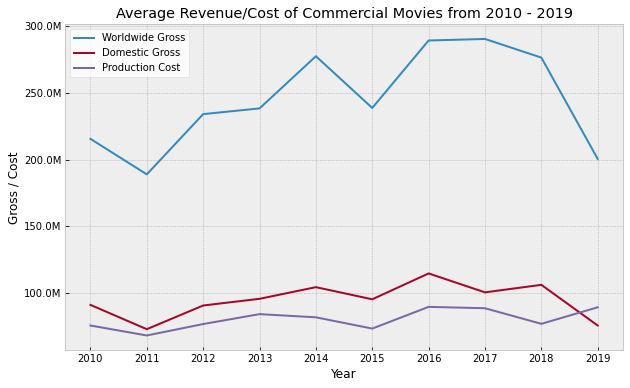

In [77]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(gby['year'], gby['worldwide_gross'], label='Worldwide Gross')
    ax.plot(gby['year'], gby['domestic_gross'], label='Domestic Gross')
    ax.plot(gby['year'], gby['production_budget'], label='Production Cost')

    ax.set_xlabel('Year')
    ax.set_ylabel('Gross / Cost')
    ax.set_title('Average Revenue/Cost of Commercial Movies from 2010 - 2019')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    
    ax.legend(facecolor='white')
    ax.set_xticks(np.arange(2010, 2020, 1))

# Analyze how franchises perform compared to non-franchises
- Over time has the trend changed
- Do they have a higher positive correlation between production cost and worldwide gross
- Use this site to gather data: https://www.filmsite.org/

## Gather Data on franchises
- Use read_html to gather the data
- Turn the data into DF's
- Feature engineer a way to properly show the data we are looking for
- Create test to show if movie is part of a franchise

In [78]:
# Begin loading in datasets and transform into readable Dataframes
#Page 1
#https://stackoverflow.com/questions/39710903/pd-read-html-imports-a-list-rather-than-a-dataframe

url = 'https://www.filmsite.org/series-boxoffice.html'
dfs = pd.read_html(url)
df1 = pd.concat(dfs)
df1.drop(columns=[0,1,5], inplace=True)
df1 = df1.rename(columns={2: 'series_list', 3:'number_of_films_in_franchise', 4:'top_movie'})
df1

,series_list,number_of_films_in_franchise,top_movie
0,NaN,NaN,NaN
0,NaN,NaN,NaN
0,"Greatest Film Series Franchises (part 1 of 4,...","Greatest Film Series Franchises (part 1 of 4,...","Greatest Film Series Franchises (part 1 of 4,..."
1,"Individual Films in Franchise (if clickable, ...",# of Films in Franchise,# 1 Film in Franchise
2,Marvel's Cinematic Universe Iron Man (2008) ...,23,Avengers: Endgame (2019)
3,Pixar-Disney Animations * Toy Story (1995) A...,23,Incredibles 2 (2018)
4,Star Wars (Ranked) Star Wars: (Original Trilo...,12,Star Wars: Episode VII - The Force Awakens (2015)
5,Disney (Live-Action Animations Reimagined) Th...,15,The Lion King (2019)
6,J.K. Rowling Wizardry Harry Potter Harry Pott...,10 (or 8),"Harry Potter and the Deathly Hallows, Part 2 (..."
7,Avengers (see Marvel's Cinematic Universe) M...,4,Avengers: Endgame (2019)


In [79]:
# Regex expression we are using

#([a-zA-Z0-9_ ':]*)(\(\d{3,}\))

In [80]:
# Page 2

url2 = 'https://www.filmsite.org/series-boxoffice2.html'
dfs2 = pd.read_html(url2)
df2 = pd.concat(dfs2)
df2.drop(columns=[0,1,5], inplace=True)
df2 = df2.rename(columns={2: 'series_list', 3:'number_of_films_in_franchise', 4:'top_movie'})

In [81]:
# Page 3

url3 = 'https://www.filmsite.org/series-boxoffice3.html'
dfs3 = pd.read_html(url3)
df3 = pd.concat(dfs3)
df3.drop(columns=[0,1,5], inplace=True)
df3 = df3.rename(columns={2: 'series_list', 3:'number_of_films_in_franchise', 4:'top_movie'})

In [82]:
# Page 4

url4 = 'https://www.filmsite.org/series-boxoffice4.html'
dfs4 = pd.read_html(url4)
df4 = pd.concat(dfs4)
df4.drop(columns=[0,1,5], inplace=True)
df4 = df4.rename(columns={2: 'series_list', 3:'number_of_films_in_franchise', 4:'top_movie'})

In [83]:
# Feature engineer function that will split the movies in the series_list into 
#separate movies and then add them into one list per df
import re
regex1 = r"([a-zA-Z0-9_ ':]*)(\(\d{3,}\))"
df2string = ' '.join(df2['series_list'].dropna())
df2stringreg = re.findall(regex1, df2string)
df2final = [thing[0].strip() for thing in df2stringreg]

In [84]:
df1string = ' '.join(df1['series_list'].dropna())
df1stringreg = re.findall(regex1, df1string)
df1final = [thing[0].strip() for thing in df1stringreg]

In [85]:
df3string = ' '.join(df3['series_list'].dropna())
df3stringreg = re.findall(regex1, df3string)
df3final = [thing[0].strip() for thing in df3stringreg]

In [86]:
df4string = ' '.join(df4['series_list'].dropna())
df4stringreg = re.findall(regex1, df4string)
df4final = [thing[0].strip() for thing in df4stringreg]

In [87]:
# Combine outputs into one large list of all franchises

all_franchises = df1final + df2final + df3final + df4final

In [88]:
# Feature engineer column that displays if movie is part of a franchise

def franchise_tf(movie):
    if movie in all_franchises:
        return True
    else:
        return False

In [89]:
#Test
display(franchise_tf('Harry Potter and the Chamber  of Secrets'))
franchise_tf('Thor')

True

True

## Clean tn_movie_budgets and include boolean column for if the film is part of a franchise

In [90]:
tn_movie_budgets2 = tn_movie_budgets.copy()

In [91]:
tn_movie_budgets2['is_franchise'] = tn_movie_budgets2['movie'].map(franchise_tf)

In [92]:
# Make release_date into DateTime and extract year

tn_movie_budgets2['release_date'] = pd.to_datetime(tn_movie_budgets2['release_date'])

In [93]:
tn_movie_budgets2['year'] = pd.DatetimeIndex(tn_movie_budgets2['release_date']).year

In [94]:
# Turn production_budget/worldwide_gross/domestic_gross into integers

col_to_int(tn_movie_budgets2, 'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,is_franchise,year
0,1,2009-12-18,Avatar,425000000,"$760,507,625","$2,776,345,279",False,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",False,2011
2,3,2019-06-07,Dark Phoenix,350000000,"$42,762,350","$149,762,350",False,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",True,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747",False,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,$0,$0,False,2018
5778,79,1999-04-02,Following,6000,"$48,482","$240,495",False,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,"$1,338","$1,338",False,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,$0,$0,False,2015


In [95]:
col_to_int(tn_movie_budgets2, 'domestic_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,is_franchise,year
0,1,2009-12-18,Avatar,425000000,760507625,"$2,776,345,279",False,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875",False,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,"$149,762,350",False,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",True,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",False,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,$0,False,2018
5778,79,1999-04-02,Following,6000,48482,"$240,495",False,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,"$1,338",False,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,$0,False,2015


In [96]:
col_to_int(tn_movie_budgets2, 'worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,is_franchise,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,False,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,False,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,False,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,True,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,False,2018
5778,79,1999-04-02,Following,6000,48482,240495,False,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,False,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,False,2015


In [97]:
# Filter out movies based on our given criteria

tn_movie_budgets2 = tn_movie_budgets2.loc[(tn_movie_budgets2['production_budget'] > 20000000) & ((tn_movie_budgets2['year'] >= 2010)) & (tn_movie_budgets2['year'] <= 2019)]

In [98]:
# Check % of movies which are franchises

tn_movie_budgets2['is_franchise'].value_counts(normalize=True)

False    0.840212
True     0.159788
Name: is_franchise, dtype: float64

## Create Visualization A: Time trend for Franchise vs. Non-Franchise movies

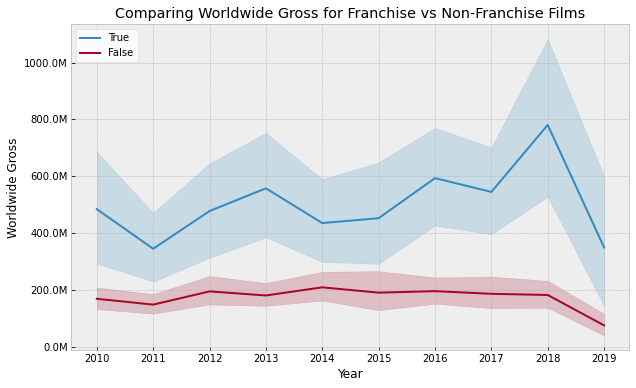

In [99]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.lineplot(data=tn_movie_budgets2, x='year', y='worldwide_gross', hue='is_franchise', hue_order=(True, False))
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Worldwide Gross')
    ax.set_title('Comparing Worldwide Gross for Franchise vs Non-Franchise Films')
    
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    
    ax.legend(facecolor='white', loc=2)
    ax.set_xticks(np.arange(2010, 2020, 1));

### Conclusion:
- Franchise films have outperformed non-franchise films every year
- They follow a similar trend, both declined towards 2018
- Franchise films have greater standard deviation

In [100]:
tn_movie_budgets2 = tn_movie_budgets2[tn_movie_budgets2['worldwide_gross'] != 0]

## Create Visualization B: Linear Regression Scatter Plot displaying relationship between Worldwide Gross and Production Cost for Franchise vs. Non-Franchise Films

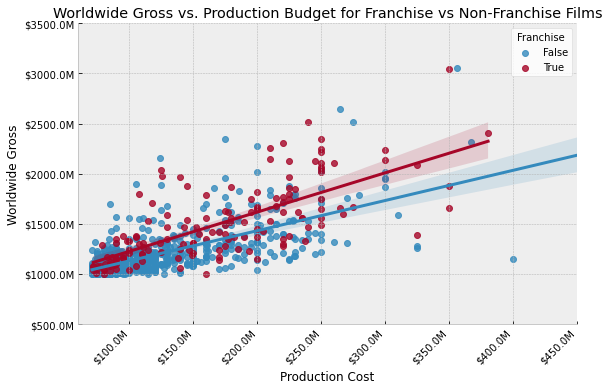

In [101]:
with plt.style.context('bmh'):
    
    #g=sns.FacetGrid(data=tn_movie_budgets2, aspect=(1 * 3))
    g = (sns.lmplot(data=tn_movie_budgets2, x='production_budget', y='worldwide_gross', hue='is_franchise', legend=False, height=5, aspect=(1.5)))
    
    g.axes[0,0].set_xlabel('Production Cost')
    g.axes[0,0].set_ylabel('Worldwide Gross')
    g.axes[0,0].set_title('Worldwide Gross vs. Production Budget for Franchise vs Non-Franchise Films')
    #factorplot(height=2, aspect=1)
    
    #formatter = FuncFormatter(millions)
    #g = sns.FacetGrid(data = tn_movie_budgets2, col_wrap = 4, margin_titles=True, height=3) #4/3 ratio
    #g.yaxis.set_major_formatter(formatter)
    
    t_labels = ['$50.0M', '$100.0M', '$150.0M', '$200.0M', '$250.0M', '$300.0M', '$350.0M', '$400.0M', '$450.0M', '$500.0M']
    g.set_xticklabels(t_labels)
    y_labs5 = ['$500.0M', '$1000.0M', '$1500.0M','$2000.0M', '$2500.0M', '$3000.0M', '$3500.0M']
    g.set_xticklabels(rotation = 45, ha='right')
    g.set_yticklabels(y_labs5)
#   g.set_xlim(20000000, 500000000)
    g.ax.set_xlim(10000000, 400000000)
    
    g.ax.legend(title='Franchise', facecolor='white')

### Conclusion:
- Franchise films have a stronger postive relationship with worldwide gross and production cost than non-franchise films
- Number of outliers is fairly similar